# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = [] 
lat_list = []
lng_list = []
max_temp_list = []
wind_Speed_list = []
counter = 0
set_counter = 1

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


#create loop to count through cities and append
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_Speed_list.append(response["wind"]["speed"])
        if counter > 49:
            counter = 0
            set_counter = set_counter + 1
    
        else:
            counter = counter + 1
            
        print(f"Processing Record {counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : arraial do cabo
Processing Record 2 of Set 1 : khatanga
Processing Record 3 of Set 1 : qaanaaq
Processing Record 4 of Set 1 : matagami
Processing Record 5 of Set 1 : kapaa
Processing Record 6 of Set 1 : saint-augustin
Processing Record 7 of Set 1 : aliaga
Processing Record 8 of Set 1 : punta arenas
Processing Record 9 of Set 1 : lebu
Processing Record 10 of Set 1 : novovarshavka
Processing Record 11 of Set 1 : kodiak
City not found. Skipping...
Processing Record 12 of Set 1 : taksimo
Processing Record 13 of Set 1 : comonfort
Processing Record 14 of Set 1 : mattawa
Processing Record 15 of Set 1 : ust-kut
Processing Record 16 of Set 1 : klaksvik
Processing Record 17 of Set 1 : ostrovnoy
City not found. Skipping...
Processing Record 18 of Set 1 : te anau
Processing Record 19 of Set 1 : avarua
Processing Record 20 of Set 1 : paamiut
City not found. Skipping...
Processing Record 21 of Set 1 : busselton
Pr

Processing Record 37 of Set 4 : vostok
Processing Record 38 of Set 4 : longyearbyen
Processing Record 39 of Set 4 : nagua
Processing Record 40 of Set 4 : yar-sale
Processing Record 41 of Set 4 : alyangula
Processing Record 42 of Set 4 : inuvik
Processing Record 43 of Set 4 : granville
Processing Record 44 of Set 4 : saint-pierre
Processing Record 45 of Set 4 : cranbrook
Processing Record 46 of Set 4 : santander
Processing Record 47 of Set 4 : sitka
Processing Record 48 of Set 4 : upernavik
Processing Record 49 of Set 4 : yellowknife
Processing Record 50 of Set 4 : dikson
Processing Record 0 of Set 5 : anchorage
Processing Record 1 of Set 5 : leczyca
Processing Record 2 of Set 5 : leningradskiy
Processing Record 3 of Set 5 : minnedosa
Processing Record 4 of Set 5 : neuquen
Processing Record 5 of Set 5 : bambous virieux
Processing Record 6 of Set 5 : nanortalik
Processing Record 7 of Set 5 : lavrentiya
City not found. Skipping...
Processing Record 8 of Set 5 : anloga
Processing Record 9 

Processing Record 26 of Set 8 : itaguai
Processing Record 27 of Set 8 : pisco
City not found. Skipping...
Processing Record 28 of Set 8 : saint-francois
Processing Record 29 of Set 8 : fortuna
Processing Record 30 of Set 8 : miraflores
Processing Record 31 of Set 8 : tonj
Processing Record 32 of Set 8 : bodaybo
Processing Record 33 of Set 8 : bati
Processing Record 34 of Set 8 : tura
Processing Record 35 of Set 8 : hovd
Processing Record 36 of Set 8 : zhigansk
Processing Record 37 of Set 8 : batagay
Processing Record 38 of Set 8 : severnyy
Processing Record 39 of Set 8 : kirakira
Processing Record 40 of Set 8 : vanersborg
Processing Record 41 of Set 8 : huarmey
Processing Record 42 of Set 8 : muyezerskiy
Processing Record 43 of Set 8 : matara
Processing Record 44 of Set 8 : geraldton
City not found. Skipping...
Processing Record 45 of Set 8 : andenes
City not found. Skipping...
Processing Record 46 of Set 8 : bollnas
Processing Record 47 of Set 8 : victoria
Processing Record 48 of Set 

Processing Record 11 of Set 12 : rock springs
Processing Record 12 of Set 12 : newberg
Processing Record 13 of Set 12 : ust-ishim
Processing Record 14 of Set 12 : mapiripan
Processing Record 15 of Set 12 : rotifunk
Processing Record 16 of Set 12 : pacific grove
Processing Record 17 of Set 12 : karpogory
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a panda data frame using data retrieved
weather = pd.DataFrame({ 
                "City" : city_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_Speed_list,
                "Country" : country_list,
                "Date" : date_list
})

weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial do Cabo,-22.9661,-42.0278,76.91,85,0,25.64,BR,1612494174
1,Khatanga,71.9667,102.5000,-30.86,78,0,9.26,RU,1612494274
2,Qaanaaq,77.4840,-69.3632,-18.67,63,61,8.05,GL,1612494275
3,Matagami,49.7502,-77.6328,24.80,74,90,10.36,CA,1612494275
4,Kapaa,22.0752,-159.3190,70.00,56,90,5.75,US,1612494063


In [7]:
#save df to csv
weather.to_csv("output_data/cities.csv", index = False)

In [8]:
weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,20.796656,21.442606,48.839429,74.979239,53.821799,8.126972,1.612494e+09
std,34.091470,91.810619,32.617997,18.564504,39.711713,6.042492,1.616219e+02
min,-54.800000,-179.166700,-41.800000,19.000000,0.000000,0.180000,1.612494e+09
25%,-6.733825,-55.660400,28.400000,66.000000,12.000000,3.492500,1.612494e+09
50%,24.633350,26.077650,59.000000,79.000000,64.000000,6.910000,1.612494e+09
75%,50.761875,102.072100,75.200000,89.000000,92.000000,10.625000,1.612495e+09
max,78.218600,178.416700,95.000000,100.000000,100.000000,35.370000,1.612495e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
stats = weather['Humidity'].describe(include = 'all')
stats

count    578.000000
mean      74.979239
std       18.564504
min       19.000000
25%       66.000000
50%       79.000000
75%       89.000000
max      100.000000
Name: Humidity, dtype: float64

In [10]:
#  Get the indices of cities that have humidity over 100%.

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

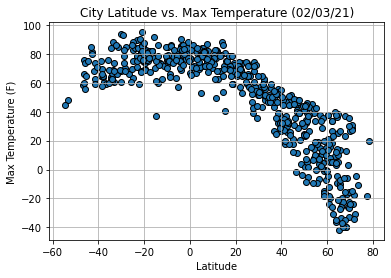

In [12]:
x_values = weather['Lat']
y_values = weather['Max Temp']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title('City Latitude vs. Max Temperature (02/03/21)')
plt.savefig('output_data/CityLatitudeVsMaxTemp.png')

## Latitude vs. Humidity Plot

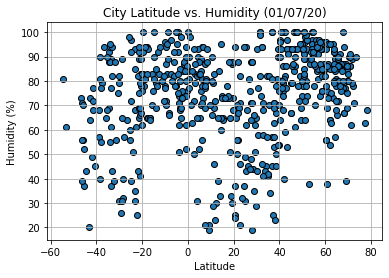

In [13]:
x_values = weather['Lat']
y_values = weather['Humidity']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title('City Latitude vs. Humidity (01/07/20)')
plt.savefig('output_data/CityLatitudeVsHumidity.png')

## Latitude vs. Cloudiness Plot

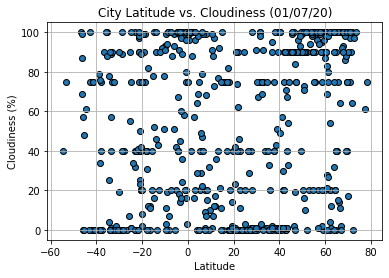

In [14]:
x_values = weather['Lat']
y_values = weather['Cloudiness']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title('City Latitude vs. Cloudiness (01/07/20)')
plt.savefig('output_data/CityLatitudeVsCloudiness.png')

## Latitude vs. Wind Speed Plot

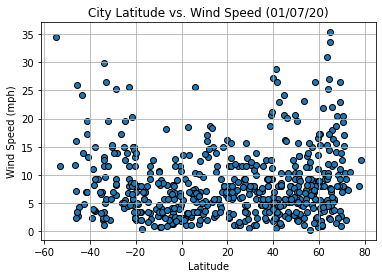

In [15]:
x_values = weather['Lat']
y_values = weather['Wind Speed']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.title('City Latitude vs. Wind Speed (01/07/20)')
plt.savefig('output_data/CityLatitudeVsWindSpeed.png')

## Linear Regression

In [16]:
def linear_reg_plot(df, title_name, y_column_name, y_label, file_name, xy):
    x_values = df['Lat']
    y_values = df[y_column_name]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    plt.title(title_name)
    
    print(f"The r-squared is: {rvalue}")
    
    plt.savefig(file_name)

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = weather.loc[weather['Lat'] > 0, :]
southern_hemisphere_df = weather.loc[weather['Lat'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8733154541949454


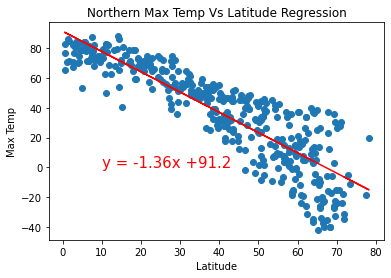

In [18]:
linear_reg_plot(northern_hemisphere_df, 'Northern Max Temp Vs Latitude Regression', 'Max Temp', 'Max Temp', 'output_data/NorthernMaxTempVsLatitudeReg.png', (10,0))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.40896826956856175


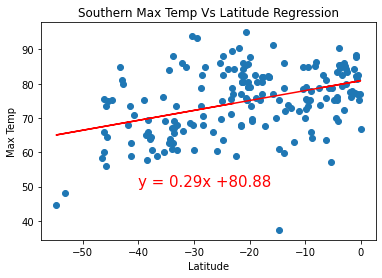

In [19]:
linear_reg_plot(southern_hemisphere_df, 'Southern Max Temp Vs Latitude Regression', 'Max Temp', 'Max Temp', 'output_data/SouthernMaxTempVsLatitudeReg.png', (-40,50)) 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.31383580757237284


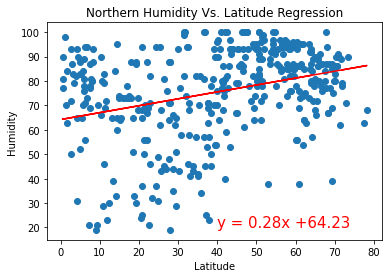

In [20]:
linear_reg_plot(northern_hemisphere_df, 'Northern Humidity Vs. Latitude Regression', 'Humidity', 'Humidity', 'output_data/NorthernHumidityVsLatitudeReg.png', (40,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.36828764981995904


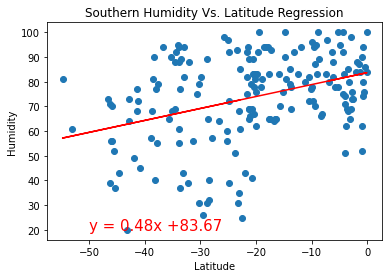

In [21]:
linear_reg_plot(southern_hemisphere_df, 'Southern Humidity Vs. Latitude Regression', 'Humidity', 'Humidity', 'output_data/SouthernHumidityVsLatitudeReg.png', (-50,20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.30618958340128366


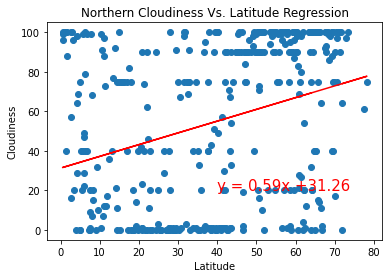

In [22]:
linear_reg_plot(northern_hemisphere_df, 'Northern Cloudiness Vs. Latitude Regression', 'Cloudiness', 'Cloudiness', 'output_data/NorthernCloudinessVsLatitudeReg.png', (40,20))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15436407679477476


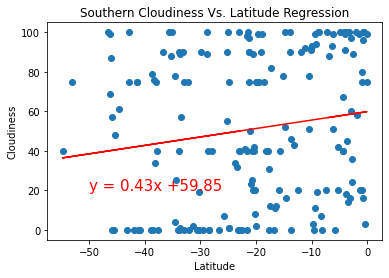

In [23]:
linear_reg_plot(southern_hemisphere_df, 'Southern Cloudiness Vs. Latitude Regression', 'Cloudiness', 'Cloudiness', 'output_data/SouthernCloudinessVsLatitudeReg.png', (-50,20))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.17937785004118717


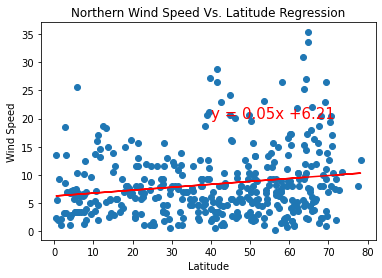

In [24]:
linear_reg_plot(northern_hemisphere_df, 'Northern Wind Speed Vs. Latitude Regression', 'Wind Speed', 'Wind Speed', 'output_data/NorthernWindSpeedVsLatitudeReg.png', (40,20))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3594751827172894


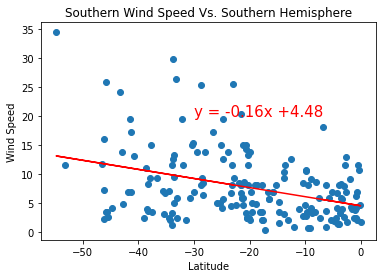

In [25]:
linear_reg_plot(southern_hemisphere_df, 'Southern Wind Speed Vs. Southern Hemisphere', 'Wind Speed', 'Wind Speed', 'output_data/SouthernWindSpeedVsLatitudeReg.png', (-30,20))